In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [5]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [7]:

df = pd.read_csv('df_boston.csv')

In [8]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q2: Use different histograms to plot features that have right, left and zero skew.

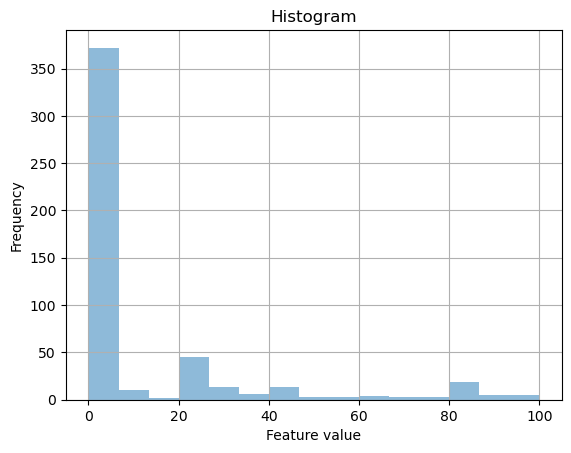

In [30]:
df_pow = df['ZN']
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

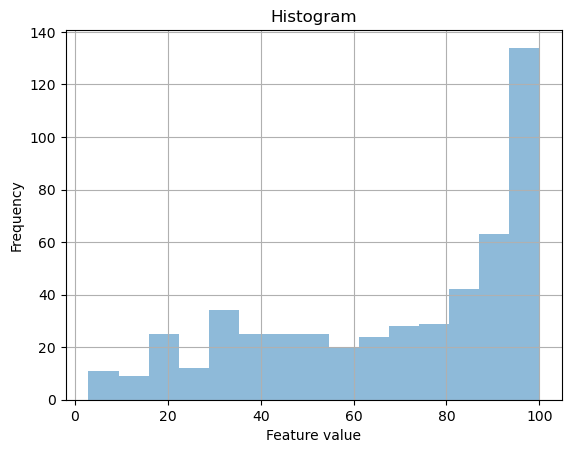

In [35]:
df1 = df['AGE']
df1.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

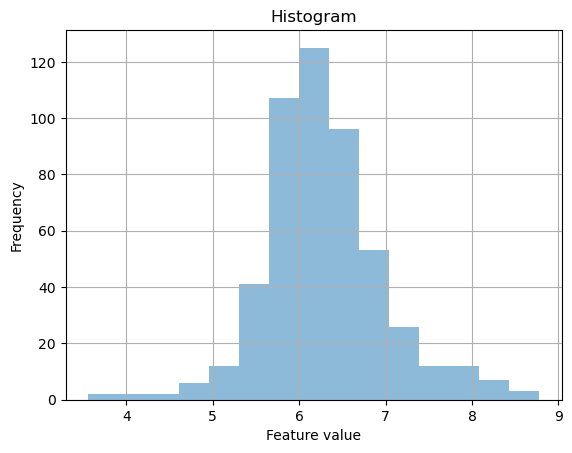

In [36]:
df2 = df['RM']
df2.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

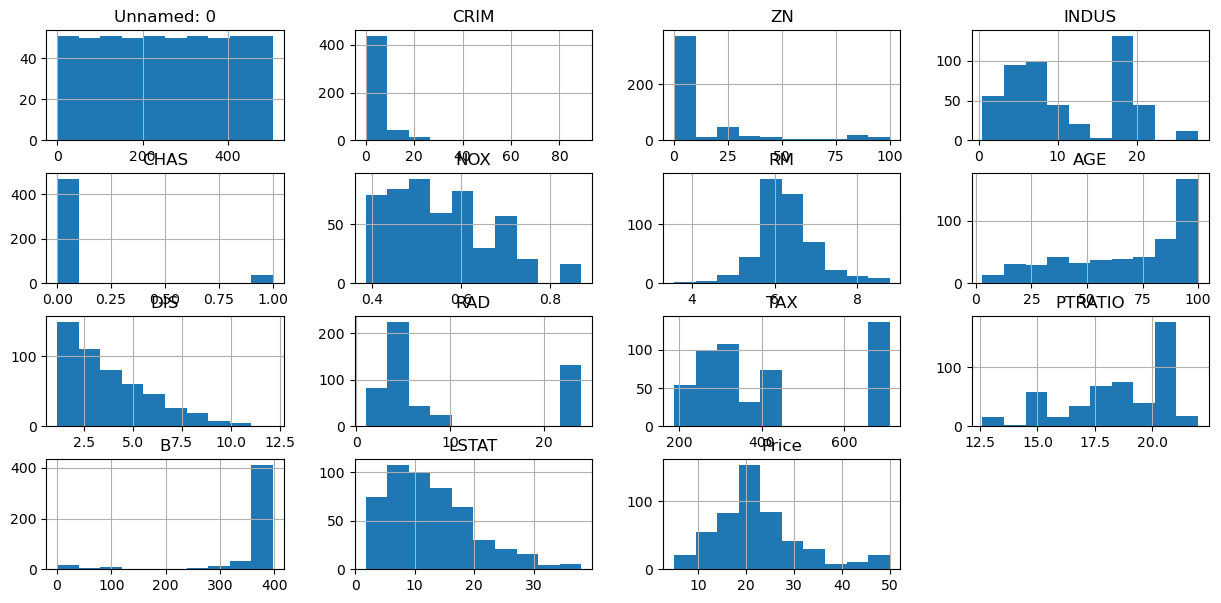

In [34]:
df.hist(figsize=(15,7) )

## Q3: Prove your previous result using mean, median and mode.

In [37]:
import statistics

In [47]:
mode = statistics.mode(df['Price'])

median = statistics.median(df['Price'])

mean = statistics.mean(df['Price'])

print("mode =",mode)
print("median =",median)
print("mean =",mean)

mode = 50.0
median = 21.2
mean = 22.532806324110673


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [48]:
skewness = df.skew()
skewness

Unnamed: 0    0.000000
CRIM          5.223149
ZN            2.225666
INDUS         0.295022
CHAS          3.405904
NOX           0.729308
RM            0.403612
AGE          -0.598963
DIS           1.011781
RAD           1.004815
TAX           0.669956
PTRATIO      -0.802325
B            -2.890374
LSTAT         0.906460
Price         1.108098
dtype: float64

## Q5: Use numpy to draw normal distribution.

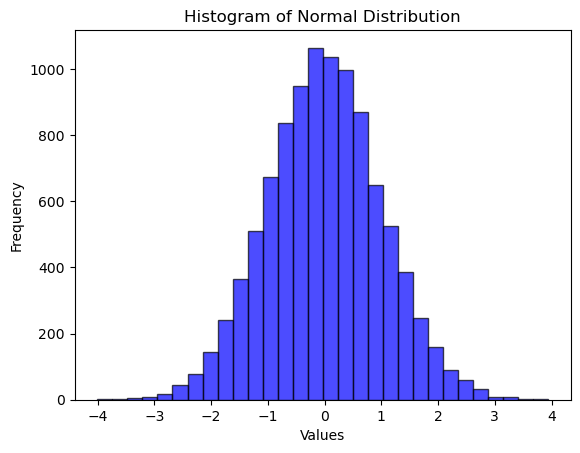

In [49]:
mean = 0  
std = 1  
size = 10000  
data = np.random.normal(mean, std, size)
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Normal Distribution')
plt.show()

## Q6: Use numpy to draw uniform distribution.

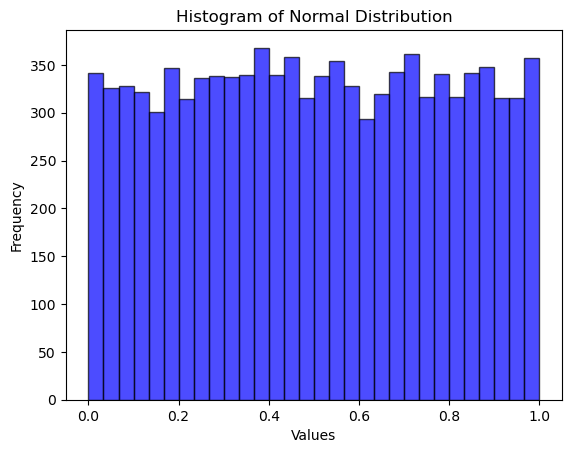

In [50]:
mean = 0  
std = 1  
size = 10000  
data = np.random.uniform(mean, std, size)
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Normal Distribution')
plt.show()

## Q7: Use numpy to draw binomial distribution.

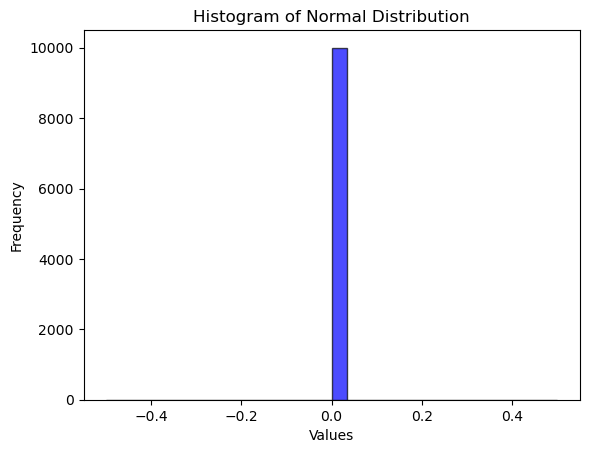

In [51]:
mean = 0  
std = 1  
size = 10000  
data = np.random.binomial(mean, std, size)
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Normal Distribution')
plt.show()

## Q8: Simulate Two Coin Flips, then draw the result distribution.

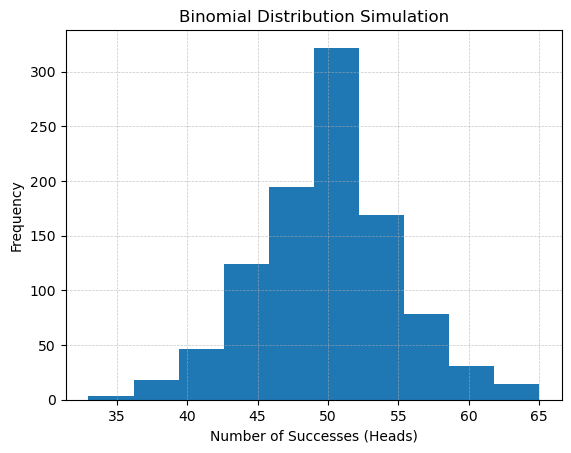

In [52]:
A = []
for i in range(1000):
    n = 100
    p = 0.5
    flip = np.random.binomial(n, p)
    A.append(flip)
    
A = pd.Series(A)
A.hist()
plt.xlabel('Number of Successes (Heads)')
plt.ylabel('Frequency')
plt.title('Binomial Distribution Simulation')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

## Q9: Summary of Descriptive Statistics

1. Using scipy.stats
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [55]:
from scipy import stats

In [57]:
nobs = len(df)
minmax = stats.describe(df).minmax
mean = stats.describe(df).mean
variance = stats.describe(df).variance
skewness = stats.describe(df).skewness
kurtosis = stats.describe(df).kurtosis
print('nobs',nobs)
print('minmax:',minmax)
print('mean:',mean)
print('variance:',variance)
print('skewness:',skewness)
print('kurtosis:',kurtosis)

nobs 506
minmax: (array([0.0000e+00, 6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00,
       3.8500e-01, 3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00,
       1.8700e+02, 1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+00]), array([505.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
         8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
       396.9   ,  37.97  ,  50.    ]))
mean: [2.52500000e+02 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 3.56674032e+02 1.26530632e+01 2.25328063e+01]
variance: [2.13785000e+04 7.39865782e+01 5.43936814e+02 4.70644425e+01
 6.45129730e-02 1.34276357e-02 4.93670850e-01 7.92358399e+02
 4.43401514e+00 7.58163660e+01 2.84047595e+04 4.68698912e+00
 8.33475226e+03 5.09947595e+01 8.45867236e+01]
skewness: [ 0.          5.20765239  2.21906306  0.29414628  3.39579929  0.72714416
  0.40241467 -0.59718559  1.00877876  1.0018334

2. method .describe()
- count: the number of elements in your dataset
- mean: the mean of your dataset
- std: the standard deviation of your dataset
- min and max: the minimum and maximum values of your dataset
- 25%, 50%, and 75%: the quartiles of your dataset

In [53]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Q9: Summarize the differences between the Z-test and the T-test in three sentences.

- If the population standard deviation is known and the sample size is greater than 30, Z-test is recommended to be used.
- If the population standard deviation is known, and the size of the sample is less than 30, T-test is recommended. 
- If the population standard deviation is unknown, T-test is recommended. 
Depending upon the previous considerations, one can select Z-test or T-test depending upon the types of hypothesis being tested:

- If we need to compare means of two independent samples (e.g., two different groups), we can use either a Z-test or a T-test.
- If we need to compare means of paired samples (e.g., before and after measurements), a paired T-test is typically used.

## Calculate

Let's assume that a class's average score is higher than 70 with a standard deviation of 10.
Calculate the Z-value to determine whether there is sufficient data to support this claim at a 0.05 
significance level if a sample of 50 students was chosen and their mean score was 80.

In [59]:
import math

In [61]:
population_mean = 70
population_std = 10
sample_mean = 80
sample_size = 50
standard_error = population_std / math.sqrt(sample_size)
Z = (sample_mean - population_mean) / standard_error
critical_Z = stats.norm.ppf(1 - 0.05)
print("Z=", Z)
if Z > critical_Z:
    print("There is sufficient data to support the claim at the 0.05 significance level.")
else:
    print("There is not sufficient data to support the claim at the 0.05 significance level.")

Z= 7.0710678118654755
There is sufficient data to support the claim at the 0.05 significance level.


An establishment wants to boost sales. According to past sales data, each sale made by 30 salesmen averaged 
40 dollar. The most recent data indicated that an average sale per transaction was 60 dollar after some training.Find the t-value for a 20 dollar standard deviation. Did a training program increase sales?

In [62]:
population_mean_before = 40
sample_mean_after = 60
standard_deviation = 20
sample_size = 30

standard_error = standard_deviation / math.sqrt(sample_size)

t = (sample_mean_after - population_mean_before) / standard_error

print("t =", t)

t = 5.477225575051661
